In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
def _build_dataframe_from_csv(filename):
    df = pd.read_csv(filename, sep=",", encoding="latin1")
    return df

In [115]:
df = _build_dataframe_from_csv("data/Hapiness-Report.csv")
columns = ["Pays", "Année", "Echelle de vie", "logGDP", "Support social", "Espérance de vie", "", "Générosité", "Perception de la corruption", "Effets positifs", "Effets négatifs"]
df.columns = columns
display(df)

,Pays,Année,Echelle de vie,logGDP,Support social,Espérance de vie,,Générosité,Perception de la corruption,Effets positifs,Effets négatifs
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


Année,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Pays,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,50.80,51.20,51.6,51.92,52.24,52.56,52.88,53.2,53.0,52.8,52.6,52.4,NaN
Albania,NaN,NaN,65.80,NaN,66.20,66.4,66.68,66.96,67.24,67.52,67.8,68.1,68.4,68.7,69.0,69.3
Algeria,NaN,NaN,NaN,NaN,NaN,64.5,64.66,64.82,NaN,65.14,NaN,65.5,65.7,65.9,66.1,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,52.50,53.20,53.90,54.60,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,66.82,66.94,67.06,67.18,67.3,67.48,67.66,67.84,68.02,68.2,68.4,68.6,68.8,69.0,69.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,65.4,65.46,NaN,65.58,65.64,65.7,65.74,65.78,65.82,65.86,65.9,66.1,66.3,66.5,66.7,66.9
Vietnam,NaN,65.86,66.02,66.18,66.34,66.5,66.66,66.82,66.98,67.14,67.3,67.5,67.7,67.9,68.1,NaN
Yemen,NaN,NaN,53.40,NaN,54.00,54.3,54.30,54.30,54.30,54.30,54.3,55.1,55.9,56.7,57.5,NaN


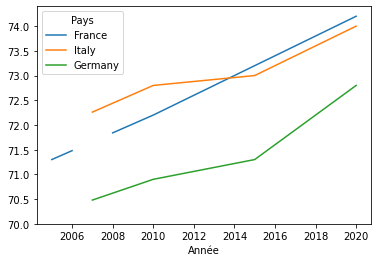

In [133]:
years = df["Année"].unique()

dfpivot = df.pivot(index = "Pays", columns = "Année", values = "Espérance de vie")
display(dfpivot)

#print(df[df.isna().any(axis=1)])

dfpivot.transpose()[["France", "Italy", "Germany"]].plot()
plt.show()


#display(dfpivot.isna().sum().sum())
#display(len(dfpivot) * len(dfpivot.columns))

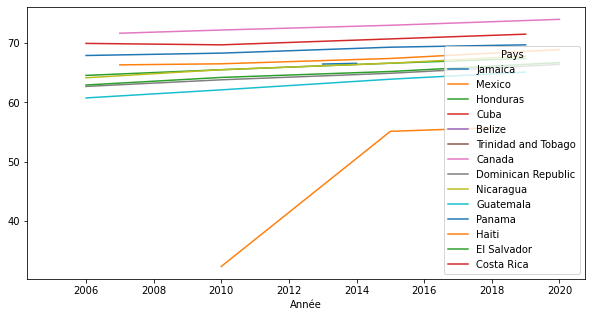

In [152]:
countries_continents_df = _build_dataframe_from_csv("data/Countries-Continents.csv")
countries_continents_df.columns = ["Continent", "Pays"]
countries_continents_df.set_index("Pays", inplace = True)

africa = list(set(countries_continents_df[countries_continents_df["Continent"] == "North America"].index.values) & set(dfpivot.index.values))
#display(dfpivot.loc[africa])

dfpivot.loc[africa].transpose().plot(figsize = (10, 5))
plt.show()
